In [1]:
# importing libraries
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import re
from sklearn.svm import SVC
import wordcloud
import string
import pickle
string.punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
msg=pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
msg.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Exploratory Data Analysis

In [4]:
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
msg.describe(include='all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [6]:
#Checking nul values

msg.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
#droping unnecessary columns

msg=msg.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis= 1)
msg.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#rename thhe columns name

msg=msg.rename({'v1':'label','v2':'message'},axis=1)

In [9]:
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#checking some message

print('100th message' + '---'+ msg['message'][100])
print('200th message' + '---'+ msg['message'][200])
print('300th message' + '---'+ msg['message'][300])
print('400th message' + '---'+ msg['message'][400])

100th message---Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx
200th message---I sent you  &lt;#&gt;  bucks
300th message---Awesome, I remember the last time we got somebody high for the first time with diesel :V
400th message---FREE RINGTONE text FIRST to 87131 for a poly or text GET to 87131 for a true tone! Help? 0845 2814032 16 after 1st free, tones are 3xå£150pw to eå£nd txt stop


In [11]:
msg['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

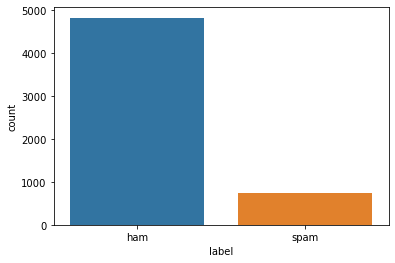

In [12]:
#count plot
sns.countplot(msg['label'])

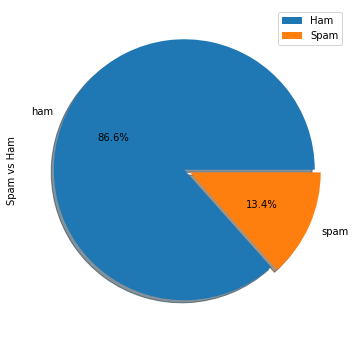

In [13]:
#pie chart

msg['label'].value_counts().plot(kind = 'pie', explode = [0, 0.05], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [14]:
# most spam or ham message

topMessages = msg.groupby("message")["label"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(10)
display(topMessages)

,len,amax
message,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


#### Top ham message with 30 count is 'Sorry, I'll call later'

In [15]:
# Now lets check the message Length 

msg['length']=msg['message'].apply(lambda x: len(x))
#sns.distplot(sms['length'], kde=True)
msg.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
msg['length'].sort_values(ascending=False)

1084    910
1862    790
2433    632
1578    611
2157    588
       ... 
4012      3
3049      2
1924      2
5357      2
4496      2
Name: length, Length: 5572, dtype: int64

In [17]:
#see the full message 

print('Type of message is' + ' '+msg['label'][1084])
print(msg['message'][1084])

Type of message is ham
For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f06eb3c9550>,
      dtype=object)

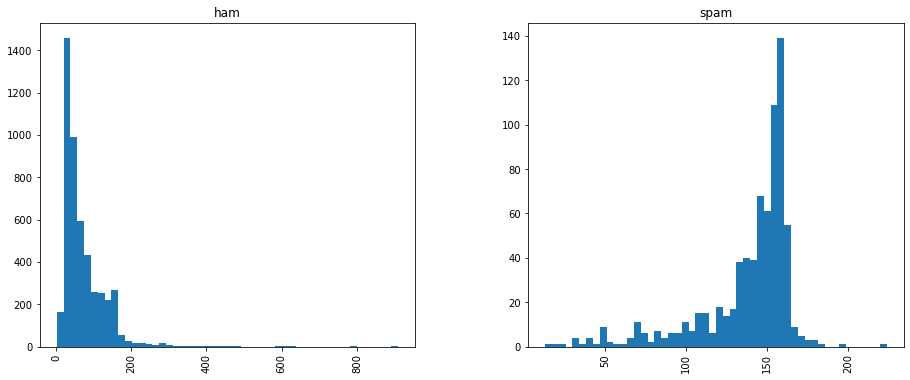

In [18]:
# checking the distribution of message length by label

msg.hist(column='length', by='label', bins=50,figsize=(15,6))

In [19]:
# making spam and ham word cloud

ham_msg=msg[msg['label']=='ham'].copy()
spam_msg=msg[msg['label']=='spam'].copy()

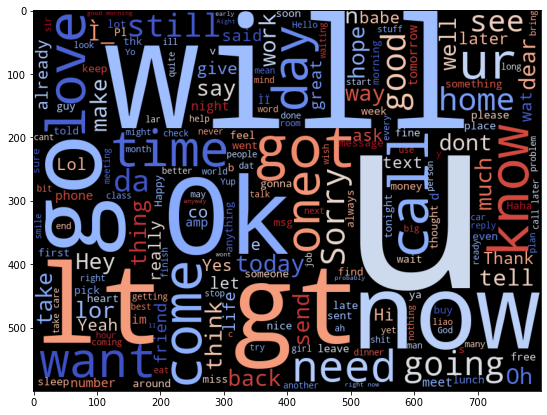

In [20]:
def show_wordcloud(df):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    diag = wordcloud.WordCloud(stopwords=stopwords,background_color='black',
                    colormap='coolwarm', width=800, height=600).generate(text)
    
    
    plt.figure(figsize=(15,7), frameon=True)
    plt.imshow(diag)  
    plt.show()
    
show_wordcloud(ham_msg)

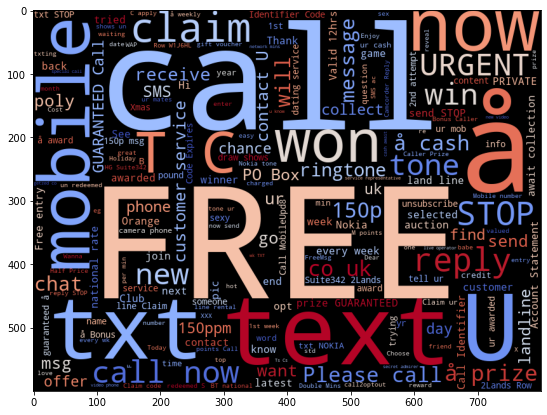

In [21]:
show_wordcloud(spam_msg)

## Data Cleaning & Preprocessing

In [22]:
#droping length columns

msg=msg.drop(['length'],axis= 1)
msg.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/bipul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/bipul/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
ps = WordNetLemmatizer()
corpus = []
for i in range(0, len(msg)):
    review = re.sub('[^a-zA-Z]', ' ', msg['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

## Creating the TF-IDF model

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(msg['label'])
y=y.iloc[:,1].values

In [26]:
pickle.dump(cv, open('CVtransform.pkl', 'wb'))

## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Training model using Naive bayes classifier

In [28]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

## Predicting

In [29]:
y_pred=spam_detect_model.predict(X_test)

In [30]:
cm=confusion_matrix(y_test,y_pred)

In [31]:
cm

array([[933,  16],
       [  6, 160]])

In [32]:
acc=accuracy_score(y_test,y_pred)
acc

0.9802690582959641

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       949
           1       0.91      0.96      0.94       166

    accuracy                           0.98      1115
   macro avg       0.95      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [34]:
#Saving the Naive Bayes Model

filename = 'MNBnlp_model.pkl'
pickle.dump(spam_detect_model, open(filename, 'wb'))

## RandomForest

In [35]:
spam_detect_modelRF = RandomForestClassifier().fit(X_train, y_train)
y_pred=spam_detect_modelRF.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(cm)
print(acc)
print(classification_report(y_test, y_pred))

[[949   0]
 [ 26 140]]
0.9766816143497757
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       949
           1       1.00      0.84      0.92       166

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## XGBOOST

In [36]:
spam_detect_modelXGB = XGBClassifier().fit(X_train, y_train)
y_pred=spam_detect_modelXGB.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(cm)
print(acc)
print(classification_report(y_test, y_pred))

/home/bipul/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:41:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[945   4]
 [ 23 143]]
0.9757847533632287
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.97      0.86      0.91       166

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## SVC

In [37]:
spam_detect_modelSVC = SVC().fit(X_train, y_train)
y_pred=spam_detect_modelSVC.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
acc=accuracy_score(y_test,y_pred)
print(cm)
print(acc)
print(classification_report(y_test, y_pred))

[[949   0]
 [ 32 134]]
0.9713004484304932
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       949
           1       1.00      0.81      0.89       166

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



#### Naive bayes classifier giving us best result we will use it for deployment